Identify the Top 10 Handsets Used by Customers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abeni\AppData\Local\Temp\ipykernel_1968\2690130230.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='viridis')


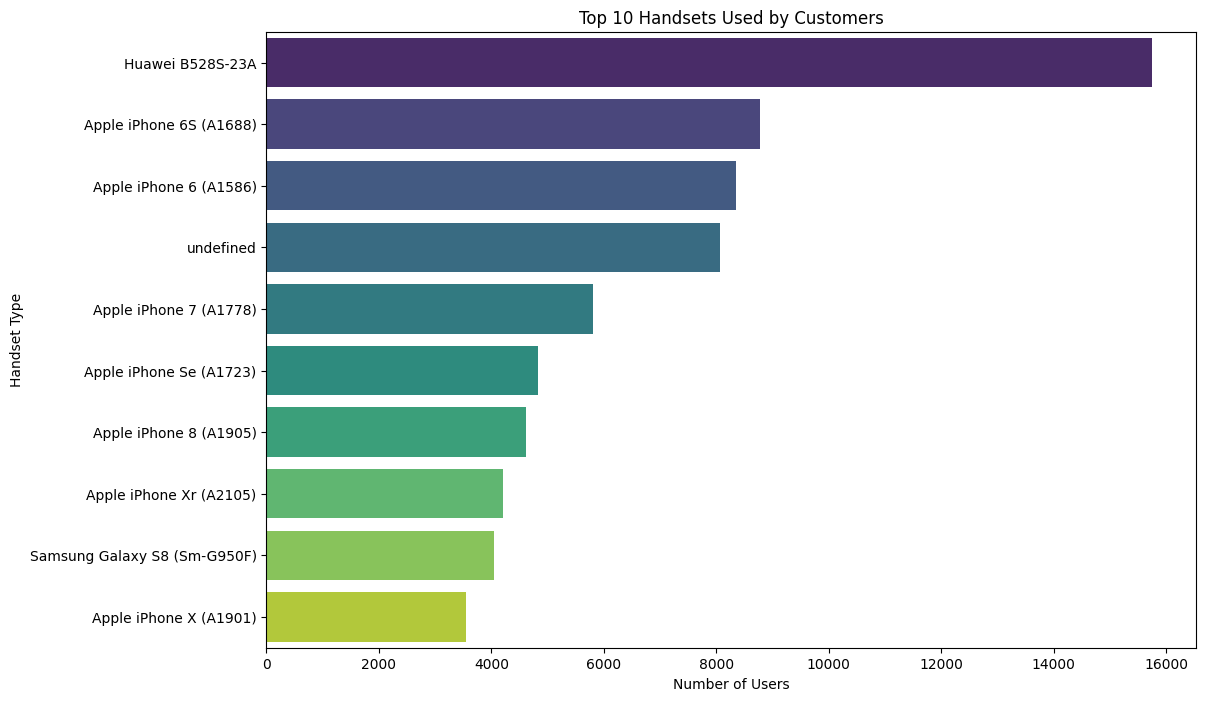

In [3]:
# Load the cleaned data
data_path = '../src/data/cleanedTelecomUsersData.csv'
df = pd.read_csv(data_path)

# Identify the top 10 handsets used by customers
top_10_handsets = df['Handset Type'].value_counts().head(10)

# Plot the top 10 handsets using a horizontal bar chart with different colors
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_handsets.values, y=top_10_handsets.index, palette='viridis')
plt.title('Top 10 Handsets Used by Customers')
plt.xlabel('Number of Users')
plt.ylabel('Handset Type')
plt.show()

Identify the Top 3 Handset Manufacturers

C:\Users\Abeni\AppData\Local\Temp\ipykernel_1968\3142625174.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values, palette='viridis')


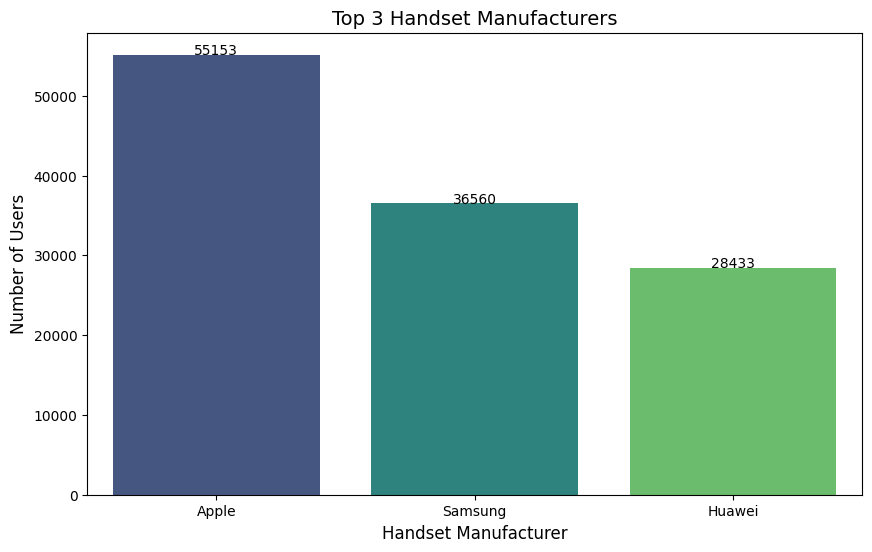

In [5]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

# Plot the top 3 handset manufacturers using a vertical bar chart with different colors and values on top of each bar
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=top_3_manufacturers.index, y=top_3_manufacturers.values, palette='viridis')
plt.title('Top 3 Handset Manufacturers', fontsize=14)
plt.xlabel('Handset Manufacturer', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add the exact values on top of each bar with smaller size
for index, value in enumerate(top_3_manufacturers.values):
    barplot.text(index, value + 0.5, f'{value}', ha='center', fontsize=10)

plt.show()

C:\Users\Abeni\AppData\Local\Temp\ipykernel_1968\1106864409.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_handsets.values, y=top_5_handsets.index, palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_1968\1106864409.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_handsets.values, y=top_5_handsets.index, palette='viridis')
C:\Users\Abeni\AppData\Local\Temp\ipykernel_1968\1106864409.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_handsets.values, y=top_5_handsets.index, palette='viridis')


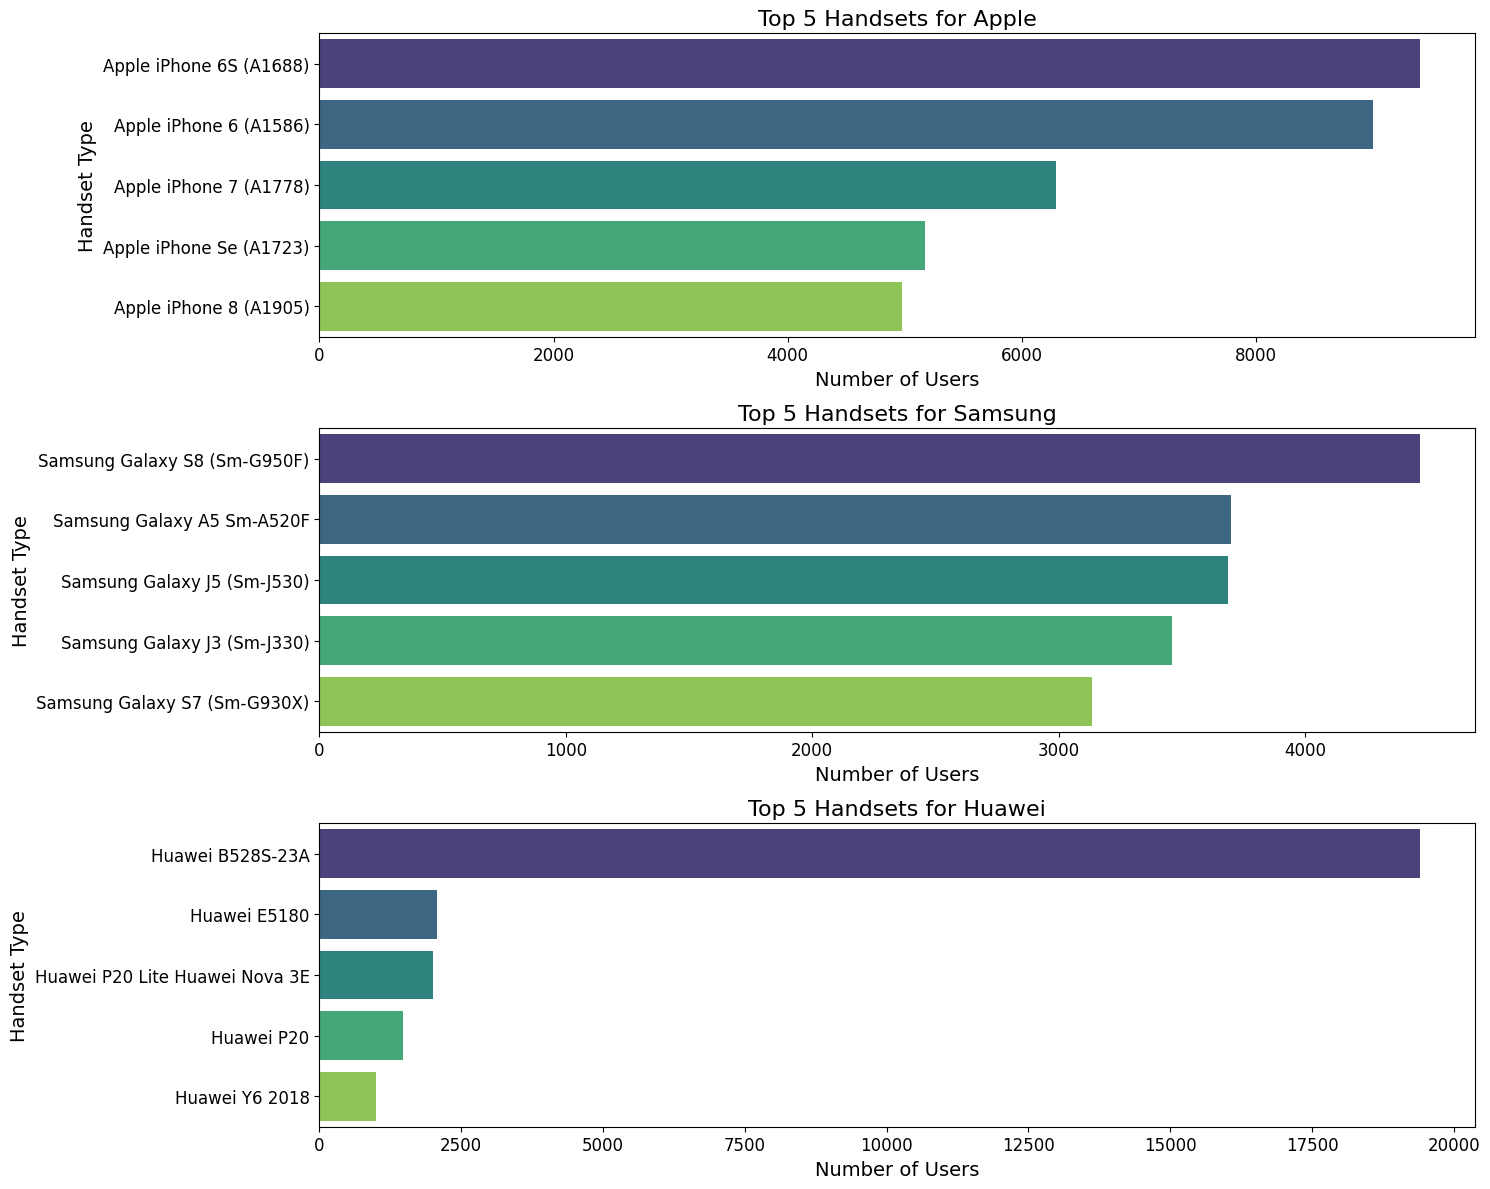

In [8]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

# Plot the top 5 handsets per top 3 handset manufacturer using horizontal bar charts with different colors and larger text
plt.figure(figsize=(15, 12))

for i, manufacturer in enumerate(top_3_manufacturers.index, 1):
    plt.subplot(3, 1, i)
    top_5_handsets = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    sns.barplot(x=top_5_handsets.values, y=top_5_handsets.index, palette='viridis')
    plt.title(f'Top 5 Handsets for {manufacturer}', fontsize=16)
    plt.xlabel('Number of Users', fontsize=14)
    plt.ylabel('Handset Type', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Aggregate User Behavior on Applications

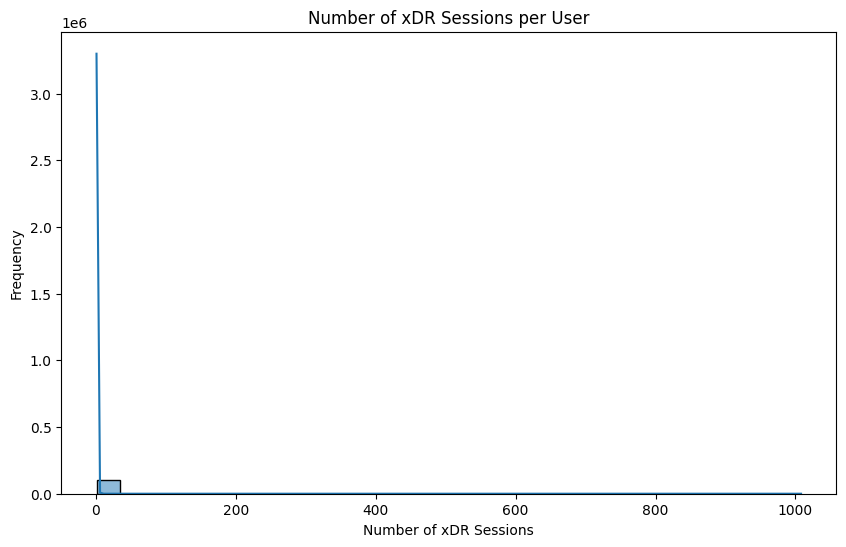

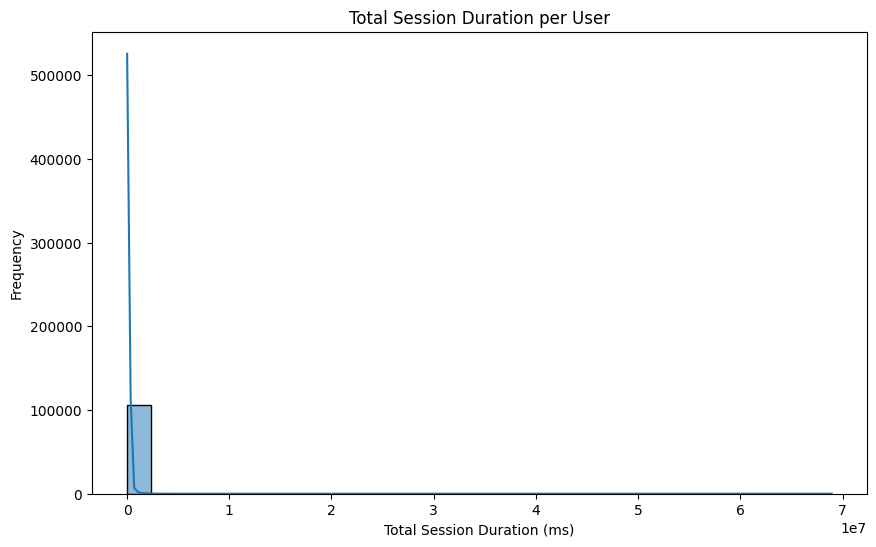

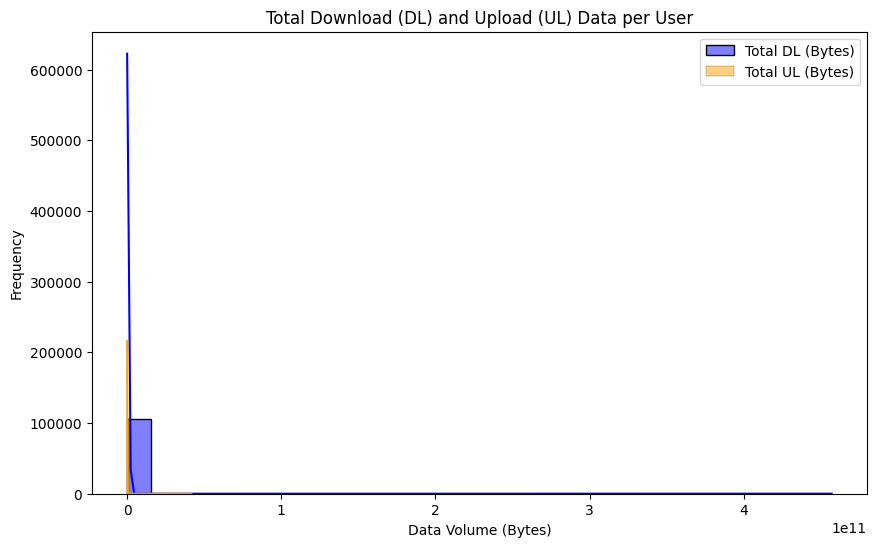

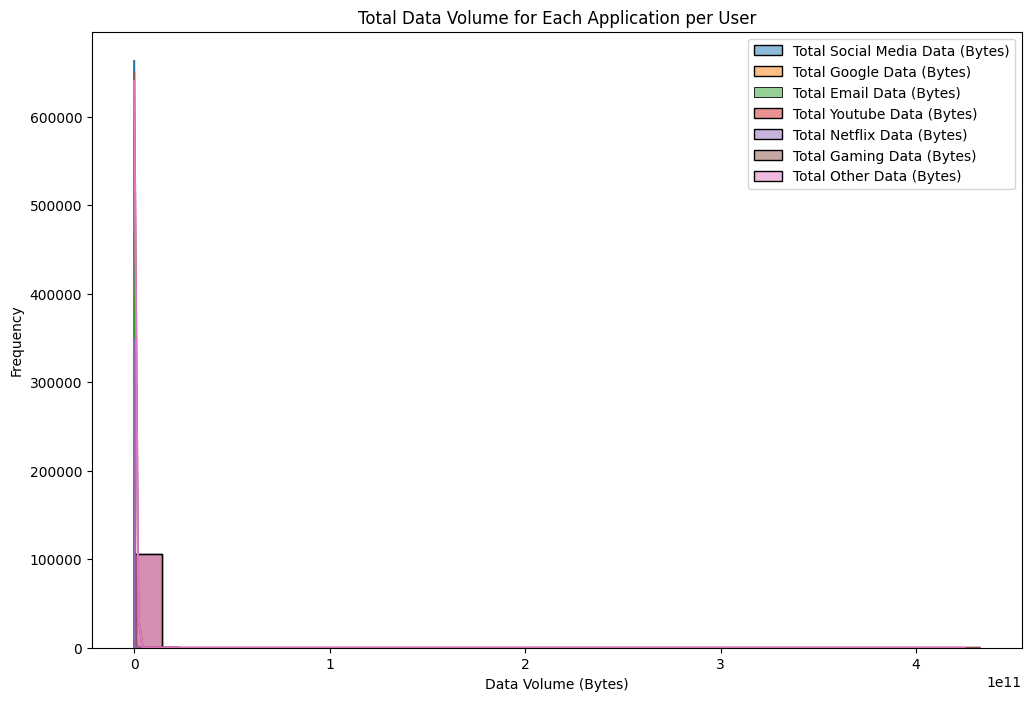

In [9]:
# Aggregate user behavior on applications
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
user_behavior.columns = [
    'MSISDN/Number', 'Number of xDR Sessions', 'Total Session Duration (ms)', 
    'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Calculate the total data volume (in Bytes) for each application
user_behavior['Total Social Media Data (Bytes)'] = user_behavior['Social Media DL (Bytes)'] + user_behavior['Social Media UL (Bytes)']
user_behavior['Total Google Data (Bytes)'] = user_behavior['Google DL (Bytes)'] + user_behavior['Google UL (Bytes)']
user_behavior['Total Email Data (Bytes)'] = user_behavior['Email DL (Bytes)'] + user_behavior['Email UL (Bytes)']
user_behavior['Total Youtube Data (Bytes)'] = user_behavior['Youtube DL (Bytes)'] + user_behavior['Youtube UL (Bytes)']
user_behavior['Total Netflix Data (Bytes)'] = user_behavior['Netflix DL (Bytes)'] + user_behavior['Netflix UL (Bytes)']
user_behavior['Total Gaming Data (Bytes)'] = user_behavior['Gaming DL (Bytes)'] + user_behavior['Gaming UL (Bytes)']
user_behavior['Total Other Data (Bytes)'] = user_behavior['Other DL (Bytes)'] + user_behavior['Other UL (Bytes)']

# Plot the number of xDR sessions per user
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Number of xDR Sessions'], bins=30, kde=True)
plt.title('Number of xDR Sessions per User')
plt.xlabel('Number of xDR Sessions')
plt.ylabel('Frequency')
plt.show()

# Plot the total session duration per user
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Total Session Duration (ms)'], bins=30, kde=True)
plt.title('Total Session Duration per User')
plt.xlabel('Total Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

# Plot the total download (DL) and upload (UL) data per user
plt.figure(figsize=(10, 6))
sns.histplot(user_behavior['Total DL (Bytes)'], bins=30, kde=True, color='blue', label='Total DL (Bytes)')
sns.histplot(user_behavior['Total UL (Bytes)'], bins=30, kde=True, color='orange', label='Total UL (Bytes)')
plt.title('Total Download (DL) and Upload (UL) Data per User')
plt.xlabel('Data Volume (Bytes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot the total data volume (in Bytes) for each application per user
applications = ['Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 
                'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 
                'Total Other Data (Bytes)']

plt.figure(figsize=(12, 8))
for app in applications:
    sns.histplot(user_behavior[app], bins=30, kde=True, label=app)

plt.title('Total Data Volume for Each Application per User')
plt.xlabel('Data Volume (Bytes)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


Describe All Relevant Variables and Associated Data Types
We'll describe the relevant variables and their associated data types.

In [10]:
# Aggregate user behavior on applications
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
user_behavior.columns = [
    'MSISDN/Number', 'Number of xDR Sessions', 'Total Session Duration (ms)', 
    'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Describe all relevant variables and associated data types
print("Data Types:")
print(user_behavior.dtypes)

Data Types:
MSISDN/Number                   object
Number of xDR Sessions           int64
Total Session Duration (ms)    float64
Total DL (Bytes)               float64
Total UL (Bytes)               float64
Social Media DL (Bytes)        float64
Social Media UL (Bytes)        float64
Google DL (Bytes)              float64
Google UL (Bytes)              float64
Email DL (Bytes)               float64
Email UL (Bytes)               float64
Youtube DL (Bytes)             float64
Youtube UL (Bytes)             float64
Netflix DL (Bytes)             float64
Netflix UL (Bytes)             float64
Gaming DL (Bytes)              float64
Gaming UL (Bytes)              float64
Other DL (Bytes)               float64
Other UL (Bytes)               float64
dtype: object


Variable Transformations
We'll segment the users into the top five decile classes based on the total duration for all sessions and compute the total data (DL+UL) per decile class.

In [14]:
# Segment users into top five decile classes based on total session duration
user_behavior['Decile Class'] = pd.qcut(user_behavior['Total Session Duration (ms)'], 5, labels=False)

# Compute total data (DL+UL) per decile class
user_behavior['Total Data (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']
total_data_per_decile = user_behavior.groupby('Decile Class')['Total Data (Bytes)'].sum()
print("Total Data (DL+UL) per Decile Class:")
print(total_data_per_decile)

Total Data (DL+UL) per Decile Class:
Decile Class
0    1.145169e+13
1    1.249400e+13
2    1.146890e+13
3    1.382276e+13
4    2.435152e+13
Name: Total Data (Bytes), dtype: float64


Analyze Basic Metrics
We'll analyze the basic metrics (mean, median, etc.) in the dataset and explain their importance for the global objective.

In [15]:
# Analyze basic metrics
basic_metrics = user_behavior.describe()
print("Basic Metrics:")
print(basic_metrics)

Basic Metrics:
       Number of xDR Sessions  Total Session Duration (ms)  Total DL (Bytes)  \
count           106209.000000                 1.062090e+05      1.062090e+05   
mean                 1.397753                 1.463870e+05      6.353913e+08   
std                  3.189487                 2.803522e+05      1.474473e+09   
min                  1.000000                 7.142000e+03      8.827082e+06   
25%                  1.000000                 7.133600e+04      3.139201e+08   
50%                  1.000000                 1.026270e+05      5.690365e+08   
75%                  2.000000                 1.727990e+05      8.054873e+08   
max               1008.000000                 6.893565e+07      4.571284e+11   

       Total UL (Bytes)  Social Media DL (Bytes)  Social Media UL (Bytes)  \
count      1.062090e+05             1.062090e+05             1.062090e+05   
mean       5.747708e+07             2.508928e+06             4.601618e+04   
std        1.325750e+08          

Non-Graphical Univariate Analysis
We'll compute dispersion parameters for each quantitative variable and provide useful interpretation.

In [20]:
# Replace non-numeric values with NaN
user_behavior = user_behavior.apply(pd.to_numeric, errors='coerce')

In [21]:
# Compute dispersion parameters
dispersion_parameters = user_behavior.var()
print("Dispersion Parameters (Variance):")
print(dispersion_parameters)

dispersion_parameters = user_behavior.std()
print("Dispersion Parameters (Standard Deviation):")
print(dispersion_parameters)

Dispersion Parameters (Variance):
MSISDN/Number                  1.069094e+24
Number of xDR Sessions         1.017283e+01
Total Session Duration (ms)    7.859736e+10
Total DL (Bytes)               2.174069e+18
Total UL (Bytes)               1.757614e+16
Social Media DL (Bytes)        3.497576e+13
Social Media UL (Bytes)        1.211138e+10
Google DL (Bytes)              3.400804e+14
Google UL (Bytes)              4.681752e+13
Email DL (Bytes)               3.390531e+13
Email UL (Bytes)               2.327379e+12
Youtube DL (Bytes)             1.448594e+15
Youtube UL (Bytes)             1.298908e+15
Netflix DL (Bytes)             1.413892e+15
Netflix UL (Bytes)             1.319085e+15
Gaming DL (Bytes)              1.885339e+18
Gaming UL (Bytes)              6.975079e+14
Other DL (Bytes)               1.821533e+18
Other UL (Bytes)               7.613605e+14
Decile Class                   2.013751e+00
Total Data (Bytes)             2.573105e+18
dtype: float64
Dispersion Parameters (Stan

Graphical Univariate Analysis
We'll identify the most suitable plotting options for each variable and interpret the findings.

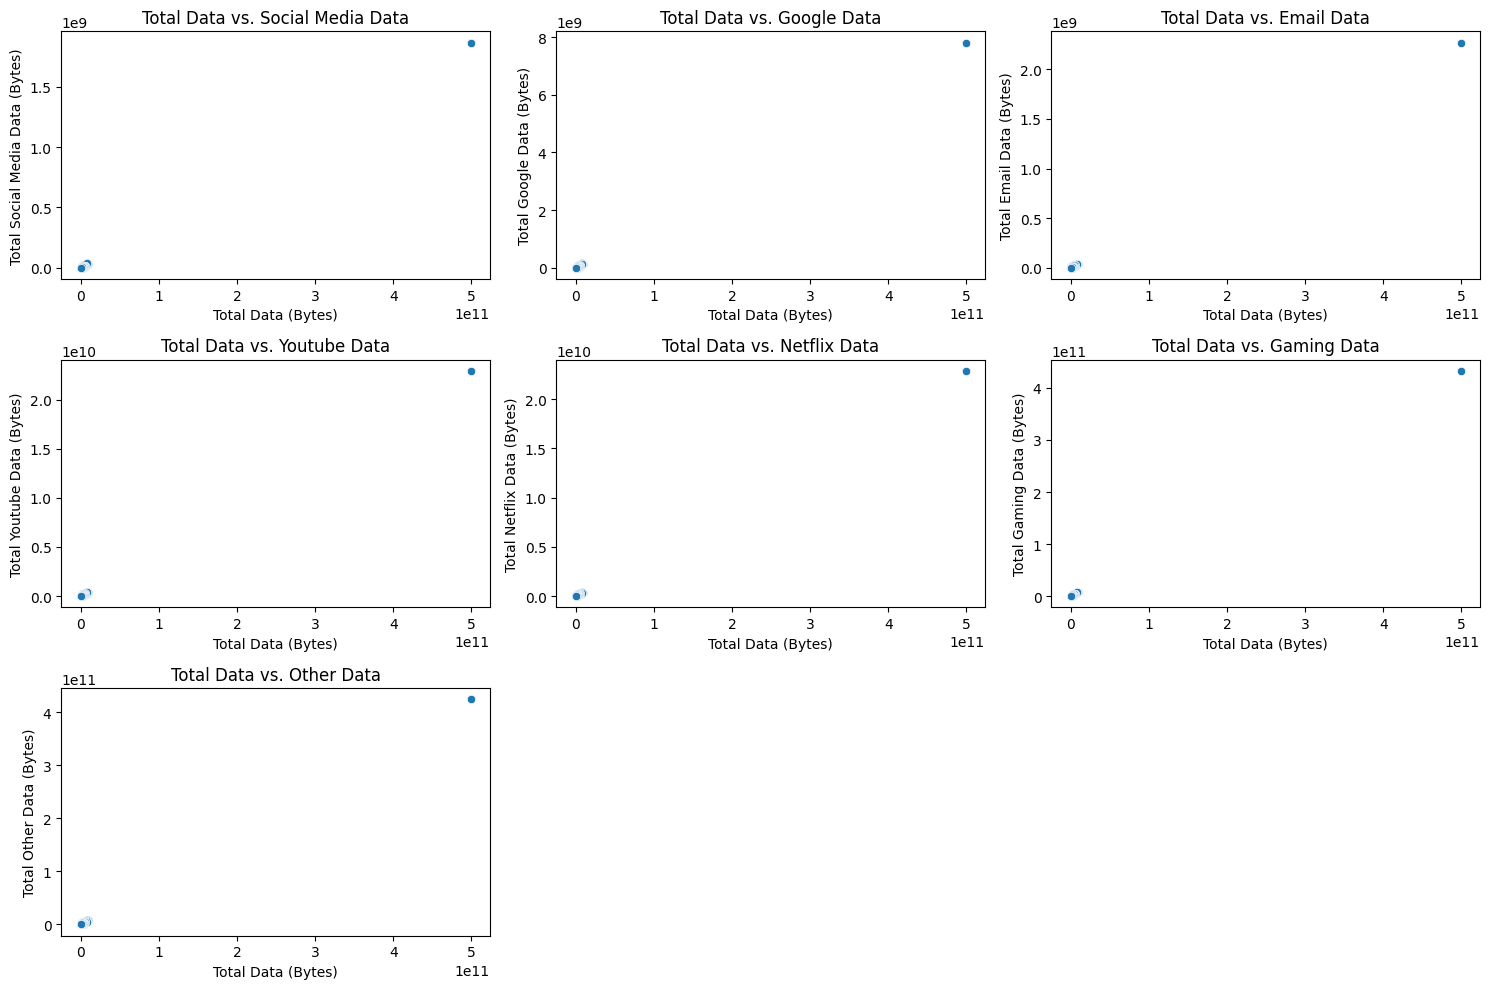

In [22]:
# Aggregate user behavior on applications
user_behavior = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count',
    'Dur. (ms)': 'sum',
    'Total DL (Bytes)': 'sum',
    'Total UL (Bytes)': 'sum',
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
    'Other UL (Bytes)': 'sum'
}).reset_index()

# Rename columns for clarity
user_behavior.columns = [
    'MSISDN/Number', 'Number of xDR Sessions', 'Total Session Duration (ms)', 
    'Total DL (Bytes)', 'Total UL (Bytes)', 'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)', 'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)'
]

# Calculate the total data volume (in Bytes) for each application
user_behavior['Total Social Media Data (Bytes)'] = user_behavior['Social Media DL (Bytes)'] + user_behavior['Social Media UL (Bytes)']
user_behavior['Total Google Data (Bytes)'] = user_behavior['Google DL (Bytes)'] + user_behavior['Google UL (Bytes)']
user_behavior['Total Email Data (Bytes)'] = user_behavior['Email DL (Bytes)'] + user_behavior['Email UL (Bytes)']
user_behavior['Total Youtube Data (Bytes)'] = user_behavior['Youtube DL (Bytes)'] + user_behavior['Youtube UL (Bytes)']
user_behavior['Total Netflix Data (Bytes)'] = user_behavior['Netflix DL (Bytes)'] + user_behavior['Netflix UL (Bytes)']
user_behavior['Total Gaming Data (Bytes)'] = user_behavior['Gaming DL (Bytes)'] + user_behavior['Gaming UL (Bytes)']
user_behavior['Total Other Data (Bytes)'] = user_behavior['Other DL (Bytes)'] + user_behavior['Other UL (Bytes)']

# Calculate the total data volume (in Bytes) for all applications
user_behavior['Total Data (Bytes)'] = user_behavior['Total DL (Bytes)'] + user_behavior['Total UL (Bytes)']

# Plot scatter plots for the relationship between each application and total data
plt.figure(figsize=(15, 10))

# Social Media vs. Total Data
plt.subplot(3, 3, 1)
sns.scatterplot(x='Total Data (Bytes)', y='Total Social Media Data (Bytes)', data=user_behavior)
plt.title('Total Data vs. Social Media Data')

# Google vs. Total Data
plt.subplot(3, 3, 2)
sns.scatterplot(x='Total Data (Bytes)', y='Total Google Data (Bytes)', data=user_behavior)
plt.title('Total Data vs. Google Data')

# Email vs. Total Data
plt.subplot(3, 3, 3)
sns.scatterplot(x='Total Data (Bytes)', y='Total Email Data (Bytes)', data=user_behavior)
plt.title('Total Data vs. Email Data')

# Youtube vs. Total Data
plt.subplot(3, 3, 4)
sns.scatterplot(x='Total Data (Bytes)', y='Total Youtube Data (Bytes)', data=user_behavior)
plt.title('Total Data vs. Youtube Data')

# Netflix vs. Total Data
plt.subplot(3, 3, 5)
sns.scatterplot(x='Total Data (Bytes)', y='Total Netflix Data (Bytes)', data=user_behavior)
plt.title('Total Data vs. Netflix Data')

# Gaming vs. Total Data
plt.subplot(3, 3, 6)
sns.scatterplot(x='Total Data (Bytes)', y='Total Gaming Data (Bytes)', data=user_behavior)
plt.title('Total Data vs. Gaming Data')

# Other vs. Total Data
plt.subplot(3, 3, 7)
sns.scatterplot(x='Total Data (Bytes)', y='Total Other Data (Bytes)', data=user_behavior)
plt.title('Total Data vs. Other Data')

plt.tight_layout()
plt.show()

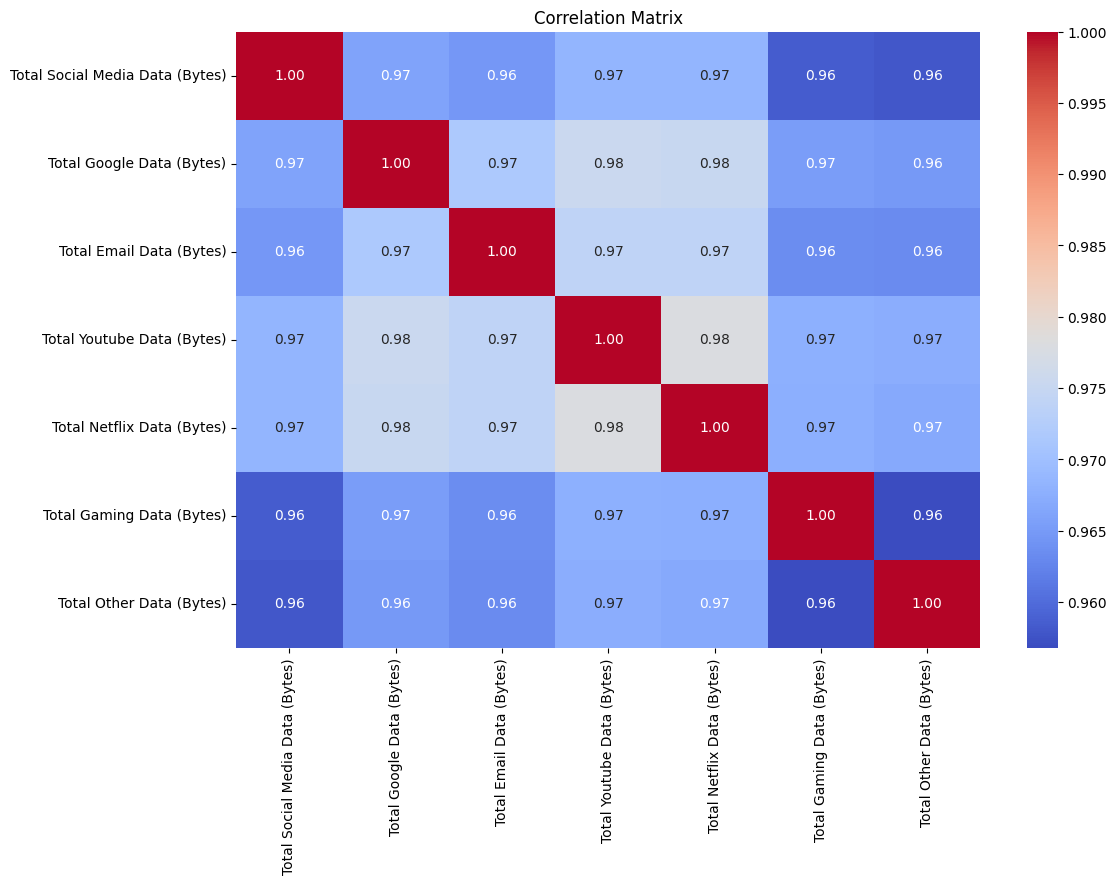

Correlation Matrix:
                                 Total Social Media Data (Bytes)  \
Total Social Media Data (Bytes)                         1.000000   
Total Google Data (Bytes)                               0.965959   
Total Email Data (Bytes)                                0.964718   
Total Youtube Data (Bytes)                              0.968408   
Total Netflix Data (Bytes)                              0.968388   
Total Gaming Data (Bytes)                               0.958410   
Total Other Data (Bytes)                                0.957883   

                                 Total Google Data (Bytes)  \
Total Social Media Data (Bytes)                   0.965959   
Total Google Data (Bytes)                         1.000000   
Total Email Data (Bytes)                          0.971535   
Total Youtube Data (Bytes)                        0.975438   
Total Netflix Data (Bytes)                        0.975180   
Total Gaming Data (Bytes)                         0.965283   
T

In [23]:
# Compute correlation matrix
correlation_matrix = user_behavior[['Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 'Total Email Data (Bytes)', 
                                    'Total Youtube Data (Bytes)', 'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 
                                    'Total Other Data (Bytes)']].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

print("Correlation Matrix:")
print(correlation_matrix)

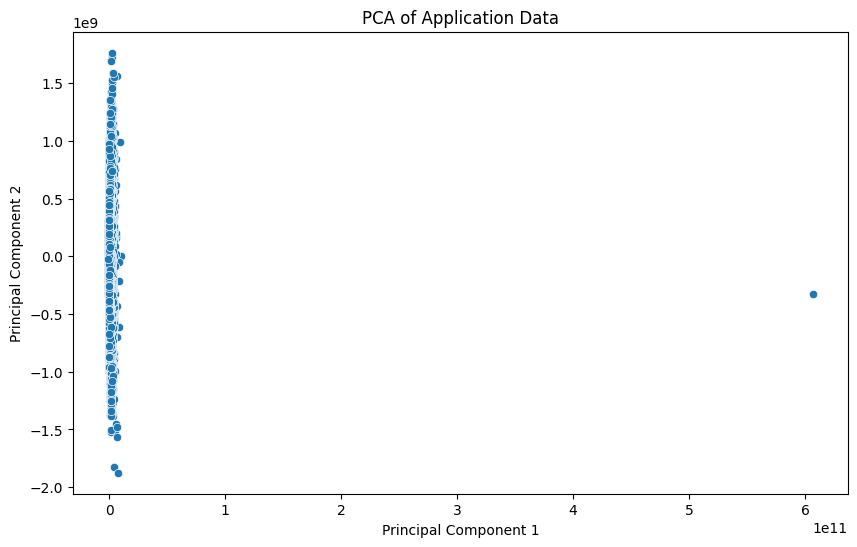

Explained Variance Ratio:
[0.97833426 0.02153572]


In [24]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(user_behavior[['Total Social Media Data (Bytes)', 'Total Google Data (Bytes)', 
                                                        'Total Email Data (Bytes)', 'Total Youtube Data (Bytes)', 
                                                        'Total Netflix Data (Bytes)', 'Total Gaming Data (Bytes)', 
                                                        'Total Other Data (Bytes)']])
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])

# Plot the PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', data=pca_df)
plt.title('PCA of Application Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:")
print(explained_variance_ratio)
